### Predicting House Price

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, BatchNormalization
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from keras.callbacks import EarlyStopping

#### Importing Data 

In [26]:
df = pd.read_csv('kc_house_dataset.csv', encoding = 'utf-8')

pd.set_option('display.max_columns', None)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
df['id'].value_counts()
#Dropping the ID column

795000620     3
3523069060    2
7129304540    2
2619920170    2
6021501535    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21436, dtype: int64

In [29]:
df.drop(['id', 'date'], axis = 1, inplace = True)

#### Scaling

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [35]:
X = df.drop('price', axis = 1)

y = df['price']

#### Train Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [38]:
X_train = scale.fit_transform(X_train)

X_test = scale.transform(X_test)

#### Model

In [44]:
X_train.shape

(15129, 18)

In [45]:
#creating neural network layer
model = Sequential()

model.add(Dense(50, input_dim = 18, activation = 'relu'))

model.add(Dense(100, activation = 'relu'))

model.add(Dense(100, activation = 'relu'))

model.add(Dense(1))

#Compiling
model.compile(loss = 'mse', optimizer = 'Adam', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [46]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 100)

Epoch 1/100
119/119 [==============================] - 19s 7ms/step - loss: 427411619566.9333 - root_mean_squared_error: 659703.7234 - val_loss: 428232212480.0000 - val_root_mean_squared_error: 653654.4375
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 422521983795.2000 - root_mean_squared_error: 652735.2484 - val_loss: 387857842176.0000 - val_root_mean_squared_error: 646501.7500
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 346917875985.0667 - root_mean_squared_error: 640185.5385 - val_loss: 226014609408.0000 - val_root_mean_squared_error: 617019.3125
Epoch 4/100
119/119 [==============================] - 0s 4ms/step - loss: 189557891208.5333 - root_mean_squared_error: 602374.8604 - val_loss: 103240515584.0000 - val_root_mean_squared_error: 567044.3750
Epoch 5/100
119/119 [==============================] - 0s 4ms/step - loss: 111362647176.5333 - root_mean_squared_error: 551994.7615 - val_loss: 95965913088.0000 - val_root_mean_sq

119/119 [==============================] - 0s 4ms/step - loss: 40056220808.5333 - root_mean_squared_error: 293383.5763 - val_loss: 39450255360.0000 - val_root_mean_squared_error: 292167.0625
Epoch 42/100
119/119 [==============================] - 0s 4ms/step - loss: 40696705979.7333 - root_mean_squared_error: 291536.8596 - val_loss: 39032561664.0000 - val_root_mean_squared_error: 290350.3750
Epoch 43/100
119/119 [==============================] - 0s 3ms/step - loss: 40482558737.0667 - root_mean_squared_error: 289744.1128 - val_loss: 38779273216.0000 - val_root_mean_squared_error: 288593.9688
Epoch 44/100
119/119 [==============================] - 0s 3ms/step - loss: 41915804245.3333 - root_mean_squared_error: 288020.4341 - val_loss: 38510850048.0000 - val_root_mean_squared_error: 286896.5625
Epoch 45/100
119/119 [==============================] - 0s 2ms/step - loss: 44645109009.0667 - root_mean_squared_error: 286353.7482 - val_loss: 38106718208.0000 - val_root_mean_squared_error: 28525

119/119 [==============================] - 0s 3ms/step - loss: 32837831415.4667 - root_mean_squared_error: 247400.5116 - val_loss: 31174952960.0000 - val_root_mean_squared_error: 246927.8281
Epoch 82/100
119/119 [==============================] - 0s 2ms/step - loss: 33624885589.3333 - root_mean_squared_error: 246693.2010 - val_loss: 31094603776.0000 - val_root_mean_squared_error: 246225.9062
Epoch 83/100
119/119 [==============================] - 0s 2ms/step - loss: 29615640439.4667 - root_mean_squared_error: 245975.3637 - val_loss: 31057592320.0000 - val_root_mean_squared_error: 245536.7812
Epoch 84/100
119/119 [==============================] - 0s 3ms/step - loss: 32300768034.1333 - root_mean_squared_error: 245306.0534 - val_loss: 30945945600.0000 - val_root_mean_squared_error: 244860.6250
Epoch 85/100
119/119 [==============================] - 0s 3ms/step - loss: 32424020070.4000 - root_mean_squared_error: 244633.9605 - val_loss: 31016249344.0000 - val_root_mean_squared_error: 24419

In [49]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,4.248037e+11,653720.1875,4.282322e+11,653654.4375
1,4.109921e+11,651752.1875,3.878578e+11,646501.7500
2,3.145537e+11,635725.3125,2.260146e+11,617019.3125
3,1.486866e+11,593503.6250,1.032405e+11,567044.3750
4,9.918351e+10,544458.3125,9.596591e+10,525080.8125


<AxesSubplot:>

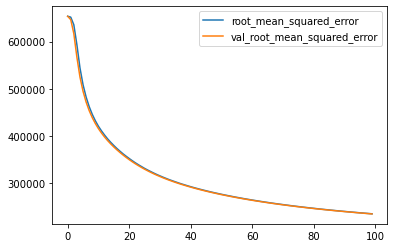

In [50]:
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [52]:
train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [53]:
def metrics(y_true, y_pred):
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('RSME:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('R2 Score:', r2_score(y_true, y_pred))

In [55]:
metrics(y_train, train_pred)

MAE: 110087.18391065353
MAPE: 0.2101570173443504
MSE: 31740557247.990356
RSME: 178158.7978405511
R2 Score: 0.7637204722052964


In [56]:
metrics(y_test, test_pred)

MAE: 109548.36324578107
MAPE: 0.20930405774788352
MSE: 29779897507.779835
RSME: 172568.52988821524
R2 Score: 0.7807070527130731


#### Trial 2

In [67]:
#creating neural network layer
model = Sequential()

model.add(Dense(50, input_dim = 18))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))



model.add(Dense(1))

#Compiling
model.compile(loss = 'mse', optimizer = 'Adam', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [76]:
 early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [69]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 500, callbacks=early_stop)

Epoch 1/500
119/119 [==============================] - 3s 8ms/step - loss: 424749700437.3333 - root_mean_squared_error: 647098.9839 - val_loss: 429772734464.0000 - val_root_mean_squared_error: 654010.6250
Epoch 2/500
119/119 [==============================] - 0s 4ms/step - loss: 425033747660.8000 - root_mean_squared_error: 653162.8656 - val_loss: 429764411392.0000 - val_root_mean_squared_error: 653482.6250
Epoch 3/500
119/119 [==============================] - 0s 4ms/step - loss: 432926444475.7333 - root_mean_squared_error: 653632.6417 - val_loss: 429735968768.0000 - val_root_mean_squared_error: 653318.7500
Epoch 4/500
119/119 [==============================] - 0s 4ms/step - loss: 419726901248.0000 - root_mean_squared_error: 652626.3490 - val_loss: 429676199936.0000 - val_root_mean_squared_error: 653231.8750
Epoch 5/500
119/119 [==============================] - 0s 4ms/step - loss: 417062146867.2000 - root_mean_squared_error: 652673.7432 - val_loss: 429604012032.0000 - val_root_mean_sq

Epoch 41/500
119/119 [==============================] - 0s 4ms/step - loss: 401948644147.2000 - root_mean_squared_error: 650840.8917 - val_loss: 421540429824.0000 - val_root_mean_squared_error: 650853.9375
Epoch 42/500
119/119 [==============================] - 0s 4ms/step - loss: 409558100923.7333 - root_mean_squared_error: 650754.6776 - val_loss: 421657083904.0000 - val_root_mean_squared_error: 650758.6875
Epoch 43/500
119/119 [==============================] - 0s 4ms/step - loss: 408698610210.1334 - root_mean_squared_error: 650671.4651 - val_loss: 421215338496.0000 - val_root_mean_squared_error: 650663.1875
Epoch 44/500
119/119 [==============================] - 0s 4ms/step - loss: 428989925785.6000 - root_mean_squared_error: 650649.6203 - val_loss: 420433756160.0000 - val_root_mean_squared_error: 650564.3750
Epoch 45/500
119/119 [==============================] - 0s 4ms/step - loss: 405309148637.8666 - root_mean_squared_error: 650470.3385 - val_loss: 419883220992.0000 - val_root_me

Epoch 81/500
119/119 [==============================] - 0s 4ms/step - loss: 377167499537.0667 - root_mean_squared_error: 645917.1937 - val_loss: 404047757312.0000 - val_root_mean_squared_error: 645870.0625
Epoch 82/500
119/119 [==============================] - 0s 4ms/step - loss: 407401114555.7333 - root_mean_squared_error: 645824.7224 - val_loss: 401093197824.0000 - val_root_mean_squared_error: 645713.5625
Epoch 83/500
119/119 [==============================] - 0s 3ms/step - loss: 384710694775.4667 - root_mean_squared_error: 645623.6099 - val_loss: 403027361792.0000 - val_root_mean_squared_error: 645556.0625
Epoch 84/500
119/119 [==============================] - 0s 3ms/step - loss: 392530318677.3333 - root_mean_squared_error: 645478.4359 - val_loss: 403141689344.0000 - val_root_mean_squared_error: 645401.2500
Epoch 85/500
119/119 [==============================] - 0s 4ms/step - loss: 402347967283.2000 - root_mean_squared_error: 645347.3844 - val_loss: 403293569024.0000 - val_root_me

Epoch 121/500
119/119 [==============================] - 0s 3ms/step - loss: 375828374323.2000 - root_mean_squared_error: 638822.2646 - val_loss: 376880594944.0000 - val_root_mean_squared_error: 638692.2500
Epoch 122/500
119/119 [==============================] - 0s 4ms/step - loss: 373329674786.1334 - root_mean_squared_error: 638615.9755 - val_loss: 377636323328.0000 - val_root_mean_squared_error: 638485.0000
Epoch 123/500
119/119 [==============================] - 0s 4ms/step - loss: 359508621721.6000 - root_mean_squared_error: 638389.9573 - val_loss: 378794180608.0000 - val_root_mean_squared_error: 638279.7500
Epoch 124/500
119/119 [==============================] - 0s 3ms/step - loss: 373088227328.0000 - root_mean_squared_error: 638206.1682 - val_loss: 372448854016.0000 - val_root_mean_squared_error: 638068.8750
Epoch 125/500
119/119 [==============================] - 0s 3ms/step - loss: 375633491831.4667 - root_mean_squared_error: 637994.4177 - val_loss: 375546544128.0000 - val_ro

119/119 [==============================] - 0s 4ms/step - loss: 352297388441.6000 - root_mean_squared_error: 629943.5990 - val_loss: 346803699712.0000 - val_root_mean_squared_error: 629771.1875
Epoch 161/500
119/119 [==============================] - 0s 3ms/step - loss: 343253432729.6000 - root_mean_squared_error: 629680.1849 - val_loss: 344549752832.0000 - val_root_mean_squared_error: 629515.7500
Epoch 162/500
119/119 [==============================] - 0s 3ms/step - loss: 335332429824.0000 - root_mean_squared_error: 629418.3339 - val_loss: 348620390400.0000 - val_root_mean_squared_error: 629261.7500
Epoch 163/500
119/119 [==============================] - 0s 4ms/step - loss: 346992573644.8000 - root_mean_squared_error: 629180.8333 - val_loss: 348718563328.0000 - val_root_mean_squared_error: 629011.0625
Epoch 164/500
119/119 [==============================] - 0s 4ms/step - loss: 345786852693.3333 - root_mean_squared_error: 628927.9234 - val_loss: 344401477632.0000 - val_root_mean_square

Epoch 200/500
119/119 [==============================] - 0s 4ms/step - loss: 305456094958.9333 - root_mean_squared_error: 618909.2120 - val_loss: 308580548608.0000 - val_root_mean_squared_error: 618716.9375
Epoch 201/500
119/119 [==============================] - 0s 4ms/step - loss: 297777895560.5333 - root_mean_squared_error: 618605.8953 - val_loss: 305517985792.0000 - val_root_mean_squared_error: 618415.5625
Epoch 202/500
119/119 [==============================] - 0s 3ms/step - loss: 304076433134.9333 - root_mean_squared_error: 618310.1740 - val_loss: 306370019328.0000 - val_root_mean_squared_error: 618112.8125
Epoch 203/500
119/119 [==============================] - 0s 4ms/step - loss: 297286679756.8000 - root_mean_squared_error: 618003.9948 - val_loss: 308965998592.0000 - val_root_mean_squared_error: 617812.3125
Epoch 204/500
119/119 [==============================] - 0s 4ms/step - loss: 309897483059.2000 - root_mean_squared_error: 617715.6505 - val_loss: 305926242304.0000 - val_ro

119/119 [==============================] - 0s 4ms/step - loss: 270625866820.2667 - root_mean_squared_error: 606546.9521 - val_loss: 270057357312.0000 - val_root_mean_squared_error: 606321.8125
Epoch 240/500
119/119 [==============================] - 0s 4ms/step - loss: 270770887475.2000 - root_mean_squared_error: 606211.3443 - val_loss: 267123867648.0000 - val_root_mean_squared_error: 605981.8750
Epoch 241/500
119/119 [==============================] - 0s 4ms/step - loss: 275553616827.7333 - root_mean_squared_error: 605872.0057 - val_loss: 273554341888.0000 - val_root_mean_squared_error: 605644.2500
Epoch 242/500
119/119 [==============================] - 0s 4ms/step - loss: 266214980130.1333 - root_mean_squared_error: 605532.1557 - val_loss: 264973041664.0000 - val_root_mean_squared_error: 605305.5000
Epoch 243/500
119/119 [==============================] - 0s 3ms/step - loss: 279061488298.6667 - root_mean_squared_error: 605198.0885 - val_loss: 269750026240.0000 - val_root_mean_square

Epoch 279/500
119/119 [==============================] - 0s 4ms/step - loss: 225043740672.0000 - root_mean_squared_error: 592306.3948 - val_loss: 230064832512.0000 - val_root_mean_squared_error: 592060.6875
Epoch 280/500
119/119 [==============================] - 0s 4ms/step - loss: 224028326843.7333 - root_mean_squared_error: 591935.4281 - val_loss: 231710851072.0000 - val_root_mean_squared_error: 591689.9375
Epoch 281/500
119/119 [==============================] - 0s 4ms/step - loss: 230123538432.0000 - root_mean_squared_error: 591569.1151 - val_loss: 229316476928.0000 - val_root_mean_squared_error: 591318.8750
Epoch 282/500
119/119 [==============================] - 0s 4ms/step - loss: 236954166340.2667 - root_mean_squared_error: 591203.3198 - val_loss: 224763215872.0000 - val_root_mean_squared_error: 590946.0000
Epoch 283/500
119/119 [==============================] - 0s 4ms/step - loss: 220745021030.4000 - root_mean_squared_error: 590819.1490 - val_loss: 224578764800.0000 - val_ro

119/119 [==============================] - 0s 4ms/step - loss: 186576073932.8000 - root_mean_squared_error: 577149.2250 - val_loss: 187875065856.0000 - val_root_mean_squared_error: 576881.7500
Epoch 319/500
119/119 [==============================] - 0s 4ms/step - loss: 184315063227.7333 - root_mean_squared_error: 576749.6927 - val_loss: 173533052928.0000 - val_root_mean_squared_error: 576474.7500
Epoch 320/500
119/119 [==============================] - 0s 4ms/step - loss: 193956497408.0000 - root_mean_squared_error: 576341.8484 - val_loss: 188188409856.0000 - val_root_mean_squared_error: 576069.1250
Epoch 321/500
119/119 [==============================] - 0s 3ms/step - loss: 181040345224.5333 - root_mean_squared_error: 575936.3906 - val_loss: 187106836480.0000 - val_root_mean_squared_error: 575669.0000
Epoch 322/500
119/119 [==============================] - 0s 4ms/step - loss: 180595797811.2000 - root_mean_squared_error: 575536.8182 - val_loss: 191130189824.0000 - val_root_mean_square

Epoch 358/500
119/119 [==============================] - 0s 3ms/step - loss: 139544374545.0667 - root_mean_squared_error: 560539.0797 - val_loss: 137811623936.0000 - val_root_mean_squared_error: 560253.6875
Epoch 359/500
119/119 [==============================] - 0s 4ms/step - loss: 140913267985.0667 - root_mean_squared_error: 560110.7818 - val_loss: 142387347456.0000 - val_root_mean_squared_error: 559827.3750
Epoch 360/500
119/119 [==============================] - 0s 4ms/step - loss: 141758162397.8667 - root_mean_squared_error: 559686.6240 - val_loss: 142678835200.0000 - val_root_mean_squared_error: 559401.8125
Epoch 361/500
119/119 [==============================] - 0s 4ms/step - loss: 134536012049.0667 - root_mean_squared_error: 559258.4365 - val_loss: 134313000960.0000 - val_root_mean_squared_error: 558971.1250
Epoch 362/500
119/119 [==============================] - 0s 4ms/step - loss: 138796835430.4000 - root_mean_squared_error: 558827.4120 - val_loss: 142719352832.0000 - val_ro

119/119 [==============================] - 0s 4ms/step - loss: 109831779874.1333 - root_mean_squared_error: 543618.2135 - val_loss: 104766668800.0000 - val_root_mean_squared_error: 543320.3750
Epoch 398/500
119/119 [==============================] - 0s 4ms/step - loss: 106748529220.2667 - root_mean_squared_error: 543176.5000 - val_loss: 99314925568.0000 - val_root_mean_squared_error: 542878.1875
Epoch 399/500
119/119 [==============================] - 0s 4ms/step - loss: 103156890146.1333 - root_mean_squared_error: 542731.0734 - val_loss: 100856733696.0000 - val_root_mean_squared_error: 542435.5000
Epoch 400/500
119/119 [==============================] - 0s 4ms/step - loss: 102085441672.5333 - root_mean_squared_error: 542289.8844 - val_loss: 106105118720.0000 - val_root_mean_squared_error: 541995.4375
Epoch 401/500
119/119 [==============================] - 0s 4ms/step - loss: 103334358630.4000 - root_mean_squared_error: 541852.5661 - val_loss: 101209907200.0000 - val_root_mean_squared

Epoch 437/500
119/119 [==============================] - 0s 4ms/step - loss: 71883666602.6667 - root_mean_squared_error: 525885.3240 - val_loss: 69389803520.0000 - val_root_mean_squared_error: 525586.0625
Epoch 438/500
119/119 [==============================] - 0s 4ms/step - loss: 71803419306.6667 - root_mean_squared_error: 525439.0599 - val_loss: 76122480640.0000 - val_root_mean_squared_error: 525142.2500
Epoch 439/500
119/119 [==============================] - 0s 3ms/step - loss: 72036519253.3333 - root_mean_squared_error: 524998.7724 - val_loss: 65298554880.0000 - val_root_mean_squared_error: 524697.1875
Epoch 440/500
119/119 [==============================] - 0s 4ms/step - loss: 72570340864.0000 - root_mean_squared_error: 524550.3807 - val_loss: 70962348032.0000 - val_root_mean_squared_error: 524251.6875
Epoch 441/500
119/119 [==============================] - 0s 4ms/step - loss: 68845175057.0667 - root_mean_squared_error: 524106.1940 - val_loss: 65832108032.0000 - val_root_mean_sq

Epoch 477/500
119/119 [==============================] - 0s 4ms/step - loss: 46928751854.9333 - root_mean_squared_error: 508202.3294 - val_loss: 44532039680.0000 - val_root_mean_squared_error: 507906.4688
Epoch 478/500
119/119 [==============================] - 0s 4ms/step - loss: 48566883498.6667 - root_mean_squared_error: 507764.2857 - val_loss: 46798008320.0000 - val_root_mean_squared_error: 507468.3125
Epoch 479/500
119/119 [==============================] - 0s 4ms/step - loss: 37685033318.4000 - root_mean_squared_error: 507322.3615 - val_loss: 46119211008.0000 - val_root_mean_squared_error: 507032.2500
Epoch 480/500
119/119 [==============================] - 0s 4ms/step - loss: 45341971080.5333 - root_mean_squared_error: 506889.8029 - val_loss: 44751605760.0000 - val_root_mean_squared_error: 506595.4375
Epoch 481/500
119/119 [==============================] - 0s 3ms/step - loss: 45625143296.0000 - root_mean_squared_error: 506452.7315 - val_loss: 39256543232.0000 - val_root_mean_sq

In [70]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,4.250445e+11,651568.7500,4.297727e+11,654010.625
1,4.250278e+11,653217.6250,4.297644e+11,653482.625
2,4.250030e+11,653549.8125,4.297360e+11,653318.750
3,4.249661e+11,652433.1250,4.296762e+11,653231.875
4,4.249146e+11,652645.2500,4.296040e+11,653172.000


<AxesSubplot:>

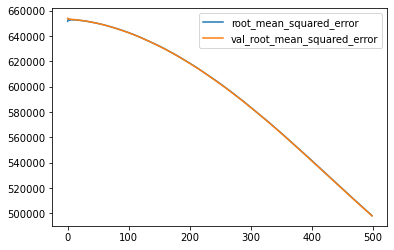

In [71]:
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [72]:
train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [73]:
metrics(y_train, train_pred)

MAE: 134779.55713414506
MAPE: 0.28955401809921316
MSE: 26662651481.80997
RSME: 163287.02178008505
R2 Score: 0.8015208538194242


In [74]:
metrics(y_test, test_pred)

MAE: 142319.54834881687
MAPE: 0.2978392918872427
MSE: 35401730024.93151
RSME: 188153.47465548306
R2 Score: 0.7393090518798733


In [75]:
#creating neural network layer
model = Sequential()

model.add(Dense(50, input_dim = 18))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))



model.add(Dense(1))

#Compiling
model.compile(loss = 'mse', optimizer = 'Adam', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [82]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 500, callbacks=[early_stop])

Epoch 1/500
119/119 [==============================] - 1s 5ms/step - loss: 29985757184.0000 - root_mean_squared_error: 497268.6875 - val_loss: 43947524096.0000 - val_root_mean_squared_error: 497055.8125
Epoch 2/500
119/119 [==============================] - 1s 5ms/step - loss: 29915789312.0000 - root_mean_squared_error: 496842.5000 - val_loss: 34731544576.0000 - val_root_mean_squared_error: 496625.9688
Epoch 3/500
119/119 [==============================] - 1s 5ms/step - loss: 29507997696.0000 - root_mean_squared_error: 496408.8125 - val_loss: 32278413312.0000 - val_root_mean_squared_error: 496193.3750
Epoch 4/500
119/119 [==============================] - 1s 5ms/step - loss: 28628533248.0000 - root_mean_squared_error: 495975.3125 - val_loss: 35261915136.0000 - val_root_mean_squared_error: 495761.0938
Epoch 5/500
119/119 [==============================] - 1s 5ms/step - loss: 29041270784.0000 - root_mean_squared_error: 495541.8750 - val_loss: 37012770816.0000 - val_root_mean_squared_erro

119/119 [==============================] - 1s 6ms/step - loss: 17010041856.0000 - root_mean_squared_error: 480452.0625 - val_loss: 24203354112.0000 - val_root_mean_squared_error: 480248.6562
Epoch 42/500
119/119 [==============================] - 1s 5ms/step - loss: 17019383808.0000 - root_mean_squared_error: 480043.9688 - val_loss: 24690159616.0000 - val_root_mean_squared_error: 479842.3125
Epoch 43/500
119/119 [==============================] - 1s 5ms/step - loss: 17081165824.0000 - root_mean_squared_error: 479639.0625 - val_loss: 25003241472.0000 - val_root_mean_squared_error: 479437.6875
Epoch 44/500
119/119 [==============================] - 1s 5ms/step - loss: 16329407488.0000 - root_mean_squared_error: 479234.9375 - val_loss: 24901687296.0000 - val_root_mean_squared_error: 479032.9062
Epoch 45/500
119/119 [==============================] - 1s 5ms/step - loss: 15900488704.0000 - root_mean_squared_error: 478828.8750 - val_loss: 25006794752.0000 - val_root_mean_squared_error: 47862

119/119 [==============================] - 1s 5ms/step - loss: 11071494144.0000 - root_mean_squared_error: 464787.6250 - val_loss: 19653122048.0000 - val_root_mean_squared_error: 464601.0625
Epoch 82/500
119/119 [==============================] - 1s 5ms/step - loss: 11202248704.0000 - root_mean_squared_error: 464413.8750 - val_loss: 21535965184.0000 - val_root_mean_squared_error: 464227.5938
Epoch 83/500
119/119 [==============================] - 1s 5ms/step - loss: 10415472640.0000 - root_mean_squared_error: 464040.6875 - val_loss: 20706371584.0000 - val_root_mean_squared_error: 463854.2500
Epoch 84/500
119/119 [==============================] - 1s 5ms/step - loss: 10960452608.0000 - root_mean_squared_error: 463666.4688 - val_loss: 19094153216.0000 - val_root_mean_squared_error: 463481.8438
Epoch 85/500
119/119 [==============================] - 1s 5ms/step - loss: 10263688192.0000 - root_mean_squared_error: 463295.4375 - val_loss: 19063721984.0000 - val_root_mean_squared_error: 46310

119/119 [==============================] - 1s 5ms/step - loss: 8616392704.0000 - root_mean_squared_error: 450415.4062 - val_loss: 18071631872.0000 - val_root_mean_squared_error: 450244.9062
Epoch 122/500
119/119 [==============================] - 1s 5ms/step - loss: 8668374016.0000 - root_mean_squared_error: 450073.6875 - val_loss: 17723136000.0000 - val_root_mean_squared_error: 449903.0312
Epoch 123/500
119/119 [==============================] - 1s 5ms/step - loss: 7875100672.0000 - root_mean_squared_error: 449731.5938 - val_loss: 17264816128.0000 - val_root_mean_squared_error: 449560.9688
Epoch 124/500
119/119 [==============================] - 1s 5ms/step - loss: 7899830272.0000 - root_mean_squared_error: 449389.1875 - val_loss: 17531136000.0000 - val_root_mean_squared_error: 449219.7500
Epoch 125/500
119/119 [==============================] - 1s 5ms/step - loss: 8480201728.0000 - root_mean_squared_error: 449049.0938 - val_loss: 17202325504.0000 - val_root_mean_squared_error: 448880

119/119 [==============================] - 1s 5ms/step - loss: 6898845696.0000 - root_mean_squared_error: 437295.2188 - val_loss: 17043894272.0000 - val_root_mean_squared_error: 437138.9688
Epoch 162/500
119/119 [==============================] - 1s 5ms/step - loss: 6531732480.0000 - root_mean_squared_error: 436981.4375 - val_loss: 17342341120.0000 - val_root_mean_squared_error: 436825.4375
Epoch 163/500
119/119 [==============================] - 1s 5ms/step - loss: 7218563584.0000 - root_mean_squared_error: 436668.6250 - val_loss: 16900854784.0000 - val_root_mean_squared_error: 436513.4375
Epoch 164/500
119/119 [==============================] - 1s 5ms/step - loss: 6966368256.0000 - root_mean_squared_error: 436357.2500 - val_loss: 17175425024.0000 - val_root_mean_squared_error: 436201.8125
Epoch 165/500
119/119 [==============================] - 1s 5ms/step - loss: 7360884224.0000 - root_mean_squared_error: 436045.7812 - val_loss: 17516929024.0000 - val_root_mean_squared_error: 435891

119/119 [==============================] - 1s 5ms/step - loss: 6882982912.0000 - root_mean_squared_error: 425286.1875 - val_loss: 18147907584.0000 - val_root_mean_squared_error: 425143.9062
Epoch 202/500
119/119 [==============================] - 1s 5ms/step - loss: 7163408384.0000 - root_mean_squared_error: 425000.3125 - val_loss: 16960840704.0000 - val_root_mean_squared_error: 424858.1562
Epoch 203/500
119/119 [==============================] - 1s 5ms/step - loss: 6320901632.0000 - root_mean_squared_error: 424714.3125 - val_loss: 16992270336.0000 - val_root_mean_squared_error: 424571.7188
Epoch 204/500
119/119 [==============================] - 1s 5ms/step - loss: 5871142912.0000 - root_mean_squared_error: 424427.7188 - val_loss: 16734201856.0000 - val_root_mean_squared_error: 424285.2500
Epoch 205/500
119/119 [==============================] - 1s 9ms/step - loss: 7478918144.0000 - root_mean_squared_error: 424143.2500 - val_loss: 17260935168.0000 - val_root_mean_squared_error: 424001

In [83]:
loss = pd.DataFrame(model.history.history)
loss.head()

loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,2.998576e+10,497268.6875,4.394752e+10,497055.81250
1,2.991579e+10,496842.5000,3.473154e+10,496625.96875
2,2.950800e+10,496408.8125,3.227841e+10,496193.37500
3,2.862853e+10,495975.3125,3.526192e+10,495761.09375
4,2.904127e+10,495541.8750,3.701277e+10,495332.25000


In [78]:
train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [79]:
metrics(y_train, train_pred)

MAE: 134123.71598246752
MAPE: 0.2918687783119329
MSE: 23610622102.19875
RSME: 153657.48306606727
R2 Score: 0.8242404316452281


In [80]:
metrics(y_test, test_pred)

MAE: 143299.5310992118
MAPE: 0.2984915504849195
MSE: 35066419229.21579
RSME: 187260.29805918763
R2 Score: 0.7417782105675557
